In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3,4,5,6"

os.environ['CUDA_PATH']='/usr/local/cuda-11'

In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset, Dataset
import re

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch

In [3]:
tokenizer = AutoTokenizer.from_pretrained("tiiuae/falcon-7b")
tokenizer.add_special_tokens({'pad_token': '<?>'})

0

In [6]:
len(tokenizer.tokenize('find: searches files/directories by criteria; xargs: executes command with input items; grep: searches text by pattern; sort: sorts text file lines; awk: processes and reports text data; sed: filters/transforms text; echo: prints arguments to output; cut: removes sections from lines; head: outputs file start; cat: concatenates/displays file content; wc: counts lines/words/characters; sudo: executes command as another user; tail: outputs file end; ls: lists directory content; mkdir: creates directory; uniq: removes duplicate lines; tr: translates characters; rsync: remote file copy/sync; split: splits file into parts; read: reads input line; diff: compares files; cd: changes directory; ssh: remote shell access; tee: reads from stdin, outputs to stdout/file; df: disk space usage; chown: changes file owner/group; ln: creates file links; set: sets shell variables; comm: compares sorted files; mount: mounts filesystems; ifconfig: network interface config; column: formats text into columns; history: command history; shopt: shell option control; rev: reverses lines; tar: archive files; od: dumps files in octal; yes: outputs strings repeatedly; nl: numbers lines; ping: network reachability test.'))

289

In [9]:
len(tokenizer.tokenize("""find: searches files/directories; -name "pattern": by name; -type d: directories; -type f: files; -perm: by permissions; -user: by owner; -group: by group; -size: by size; -mmin: modified minutes ago; -mtime: modified days ago; -exec: execute command on found items; -delete: delete found items."""))

96

In [10]:
len(tokenizer.tokenize(""""FDOPS (File and Directory Operations)": Creating, deleting, modifying files and directories - basename, cd, ln, mkdir, rmdir, rm, cp, mv, touch, ls, find, pwd, chmod, chgrp, chown, pushd, popd, dirname.; "TXTPROC (Text Processing)": Manipulating or displaying text data - awk, cat, cut, diff, fold, grep, egrep, fgrep, nl, paste, sed, sort, uniq, column, rev, tac, tr, wc, join, seq, od.; "SYSINFO (System Information and Management)": Providing system info or managing resources - df, du, uname, top, mount, ifconfig, who, whoami, w, hostname, ps, pstree, date, md5sum, file, free, uptime, history, groups, shopt.; "ARCH (File Compression and Archiving)": Compressing, decompressing, or managing archives - tar, gzip, gunzip, bzip2, bunzip2, cpio, zcat, zless.; "NET (Networking)": Handling networking tasks - ping, ssh, scp, curl, wget, dig, ssh-keygen.; "PROCCTRL (Job and Process Control)": Managing running processes and jobs - bg, fg, jobs, kill, nohup, sleep, sudo, su, tmux.; "HELPDOC (Help and Documentation)": Providing help, manuals, or documentation - man, info, apropos, which.; "PROGSCRIPT (Programming and Scripting)": Used for programming tasks or script execution - bash, sh, source, gcc.; "SHUTIL (Shell Utilities)": Providing various utility functionalities - echo, read, set, env, bind, readlink, tee, watch, yes, true, false, split, mktemp, xargs.; "SECOP (Secure Operations)": Managing security or access control - chmod, chown, chgrp, sudo, su, shred."""))

481

In [11]:
len(tokenizer.tokenize(""" cheat:man 
# To convert a man page to pdf:
man -t bash | ps2pdf - bash.pdf

# To view the ascii chart:
man 7 ascii

# To see config:
cat /private/etc/man.conf

# To check the existence of a keyword in all of man pages:
man -k <keyword>

 tldr:man 
# man
# Format and display manual pages.
# More information: <https://www.man7.org/linux/man-pages/man1/man.1.html>.

# Display the man page for a command:
man command

# Display the man page for a command from section 7:
man 7 command

# List all available sections for a command:
man -f command

# Display the path searched for manpages:
man --path

# Display the location of a manpage rather than the manpage itself:
man -w command

# Display the man page using a specific locale:
man command --locale=locale

# Search for manpages containing a search string:
man -k "search_string"
"""))

262

In [5]:
from accelerate import init_empty_weights, infer_auto_device_map, load_checkpoint_and_dispatch
from transformers import AutoConfig, AutoModelForCausalLM

In [6]:
from tune_gorilla import prep_model

In [7]:
# model = prep_model("/mnt/data/mart/test_trainer/checkpoint-625/")
# model = prep_model("/mnt/data/mart/falcon-7b-sharded-bf16/")
# model = prep_model("/mnt/data/mart/test_rewired_checkpoint/")
# model = prep_model("/mnt/data/mart/with_description/")
# model = prep_model("/mnt/data/mart/only_call_stop/")
model = prep_model("/mnt/data/mart/gorilla-falcon-7b-hf-v0/")

In [8]:
model = model.eval()

In [9]:
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
#     torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
The model 'RWForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusFor

In [10]:
from tqdm.auto import tqdm

In [23]:
eval_hf = pd.read_json('/mnt/data/mart/gorilla/data/apibench/huggingface_eval.json', lines=True)

In [54]:
apis_list = pd.read_json('/mnt/data/mart/gorilla/data/api/huggingface_api.jsonl', lines=True)

In [46]:
generations = []
for i, row in tqdm(eval_hf.iterrows()):
    cur_gen = {}
    req = re.findall(r'###.?Instruction: (.*)', row.code)[0]
    cur_gen['request'] = req
    cur_gen['expected_call'] = row.api_call
    sequences = pipeline(f"<user>: {req} \n<IDE-genie>: ", 
                         max_length=256, 
                         do_sample=True, 
                         top_k=10, 
                         num_return_sequences=1, 
                         eos_token_id=tokenizer.eos_token_id,)
    cur_gen['generated_call'] = re.findall(r'<<<api_call>>>: (.*)\n', sequences[0]['generated_text'])[0]
    generations.append(cur_gen)

0it [00:00, ?it/s]

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


KeyboardInterrupt: 

In [12]:
req = 'I want to generate images based on textual input.'
sequences = pipeline(f"<user>: {req} \n<IDE-genie>: ", 
                         max_length=256, 
                         do_sample=True, 
                         top_k=10, 
                         num_return_sequences=1, 
                         eos_token_id=tokenizer.eos_token_id,)
sequences[0]

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


In [13]:
sequences[0]

{'generated_text': '<user>: I want to generate images based on textual input. \n<IDE-genie>: /run.sh --skip_data_prep false --skip_train true --download_model mio/tokiwa_midori'}

In [108]:
def is_same_function(str_1, str_2):
    f1 = re.findall(r'^(.*)\(', str_1)[0]
    f2 = re.findall(r'^(.*)\(', str_2)[0]
    
    return f1 == f2

def is_same_model(str_1, str_2):
    m1 = re.findall(r'\((.*?)\)', str_1)[0].split(',')[0]
    m2 = re.findall(r'\((.*?)\)', str_2)[0].split(',')[0]
    
    return m1 == m2

def is_same_functionality(str_1, str_2):
    m1 = re.findall(r'\((.*?)\)', str_1)[0].split(',')[0]
    m2 = re.findall(r'\((.*?)\)', str_2)[0].split(',')[0]
    

    f1 = apis_list[apis_list.api_name == m1[1:-1]].functionality
    f2 = apis_list[apis_list.api_name == m2[1:-1]].functionality
    
    if (len(f1) > 0) and (len(f2) > 0):
        print(f1.iloc[0], f2.iloc[0])
        return f1.iloc[0] == f2.iloc[0]
    else:
        return 0

In [50]:
for gen in generations:
    print(is_same_function(gen['expected_call'], gen['generated_call']))

False
True
True
True
False
False


In [53]:
for gen in generations:
    print(is_same_model(gen['expected_call'], gen['generated_call']))

False
False
True
True
False
False


In [109]:
for gen in generations:
    print(is_same_functionality(gen['expected_call'], gen['generated_call']))

Feature Extraction Sentence Embeddings
False
Feature Extraction Fill-Mask
False
0
Feature Extraction Feature Extraction
True
Image generation and modification based on text prompts Text-to-Image
False
0


In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([  1.,   5.,  62., 206., 277., 186., 107.,  41.,  20.,   6.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <BarContainer object of 10 artists>)

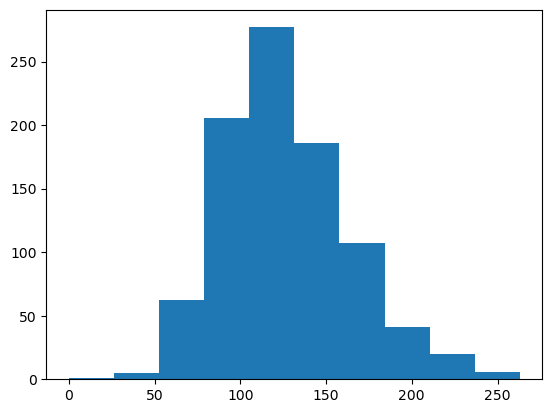

In [40]:
plt.hist([len(i) for i in generated_calls])

In [30]:
full_text

'###Instruction: Our team works on a drug development project. We need to process large amounts of biomedical text to identify entities, relations and answer questions that might be helpful.'

In [13]:
generated_calls

[["SentenceTransformer('sentence-transformers/multi-qa-MiniLM-L6-cos-v1')"],
 ["AutoModel.from_pretrained('GanjinZero/UMLSBert_ENG')"],
 ["pipeline('audio-classification', model='superb/hubert-large-superb-er')"],
 ["AutoModel.from_pretrained('rasa/LaBSE')"],
 ["StableDiffusionPipeline.from_pretrained('dreamlike-art/dreamlike-photoreal-2.0', torch_dtype=torch.float16)"],
 ["Blip2ForConditionalGeneration.from_pretrained('Salesforce/blip2-flan-t5-xxl')"],
 ["AutoModelForCausalLM.from_pretrained('microsoft/git-large-textcaps')"],
 ["pipeline('object-detection', model='microsoft/chart-qa-base')"],
 ["pipeline('text-to-video', model='camenduru/text2-video-zero')"],
 ["TimesformerForVideoClassification.from_pretrained('facebook/timesformer-hr-finetuned-k600')"],
 ["DiffusionPipeline.from_pretrained('damo-vilab/text-to-video-ms-1.7b-legacy', torch_dtype=torch.float16, variant=fp16)"],
 ["pipeline('image-to-text', model='microsoft/git-base')"],
 ["pipeline('visual-question-answering', model='m